In [1]:
import pandas as pd 
import nltk
from nltk.tokenize import word_tokenize

In [2]:
text = 'In brazil they drive on the right-hand side of the road. has a large coastline on the eastern side of South America'

token = word_tokenize(text)
token

['In',
 'brazil',
 'they',
 'drive',
 'on',
 'the',
 'right-hand',
 'side',
 'of',
 'the',
 'road',
 '.',
 'has',
 'a',
 'large',
 'coastline',
 'on',
 'the',
 'eastern',
 'side',
 'of',
 'South',
 'America']

In [3]:
from nltk.probability import FreqDist
fdist = FreqDist(token)
fdist

FreqDist({'the': 3, 'on': 2, 'side': 2, 'of': 2, 'In': 1, 'brazil': 1, 'they': 1, 'drive': 1, 'right-hand': 1, 'road': 1, ...})

In [4]:
fdist = FreqDist(token)
fdist1 = fdist.most_common(10)
fdist1


[('the', 3),
 ('on', 2),
 ('side', 2),
 ('of', 2),
 ('In', 1),
 ('brazil', 1),
 ('they', 1),
 ('drive', 1),
 ('right-hand', 1),
 ('road', 1)]

<Axes: xlabel='Key'>

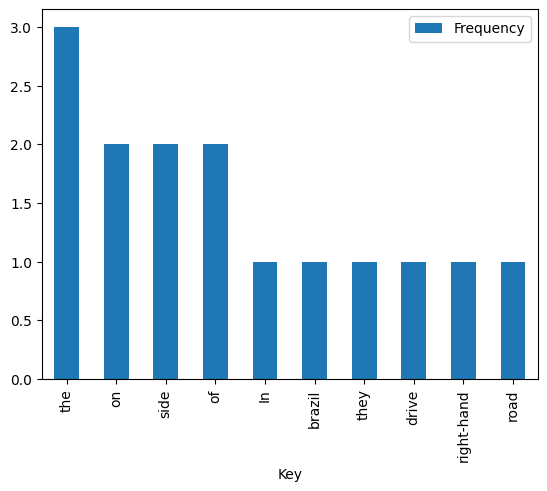

In [5]:
df_freq_tokens = pd.DataFrame(fdist1,columns=['Key','Frequency'])
df_freq_tokens.set_index('Key',inplace=True)

df_freq_tokens.plot(kind='bar')

In [6]:
from nltk import word_tokenize
from nltk.corpus import stopwords

a = set(stopwords.words('english'))
text = 'Cristiano Ronaldo was born on February 5, 1985, in Funchal, Madeira, Portugal '

text1 = word_tokenize(text.lower())

text1

stopwords = [x for x in text1 if x not in a]
stopwords

['cristiano',
 'ronaldo',
 'born',
 'february',
 '5',
 ',',
 '1985',
 ',',
 'funchal',
 ',',
 'madeira',
 ',',
 'portugal']

In [7]:
from nltk.stem.lancaster import LancasterStemmer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer

S = 'presumably I would like to Multiply my provision, saying tHat without crYing'
S

stemmer_list = [LancasterStemmer, PorterStemmer, SnowballStemmer]
names = ['Lancaster','Porter','Snowball']
for stemmer_name,stem in zip(names,stemmer_list):
    if stemmer_name == 'Snowball':
        st = stem('english')
    else:
        st = stem()
    print(stemmer_name,': ',' '.join(st.stem(s) for s in S.split()))

Lancaster :  presum i would lik to multiply my provision, say that without cry
Porter :  presum i would like to multipli my provision, say that without cri
Snowball :  presum i would like to multipli my provision, say that without cri


In [8]:
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

print('rocks : ',lemmatizer.lemmatize('rocks'))
print('corpora : ',lemmatizer.lemmatize('corpora'))

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\MSI_PC\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\MSI_PC\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


rocks :  rock
corpora :  corpus


In [9]:
import nltk
from nltk import pos_tag, word_tokenize

#nltk.download('punkt')
#nltk.download('averaged_perceptron_tagger_eng')

S = "I am currently learning NLP in English, but if possible I want to know NLP in Indonesia language too"
tokens = word_tokenize(S)
tagged = pos_tag(tokens)
print(tagged)


[('I', 'PRP'), ('am', 'VBP'), ('currently', 'RB'), ('learning', 'VBG'), ('NLP', 'NNP'), ('in', 'IN'), ('English', 'NNP'), (',', ','), ('but', 'CC'), ('if', 'IN'), ('possible', 'JJ'), ('I', 'PRP'), ('want', 'VBP'), ('to', 'TO'), ('know', 'VB'), ('NLP', 'NNP'), ('in', 'IN'), ('Indonesia', 'NNP'), ('language', 'NN'), ('too', 'RB')]


## Textblob

In [10]:
#!pip install textblob
from textblob import TextBlob

T = 'Hello, Mr. Man. He smiled!! This, i.e. that, is it.'
sentence_tokens = TextBlob(T).sentences

print(TextBlob(T).words)
print([str(sent) for sent in sentence_tokens])

['Hello', 'Mr', 'Man', 'He', 'smiled', 'This', 'i.e', 'that', 'is', 'it']
['Hello, Mr. Man.', 'He smiled!!', 'This, i.e.', 'that, is it.']


In [11]:
from textblob import Word
# stemming
print('Stem : ',Word('running').stem())

# lemmatizer
print('lemmatize : ',Word('went').lemmatize('v'))


Stem :  run
lemmatize :  go


In [12]:
for word, pos in TextBlob(T).tags:
    print(word,pos,end=', ')

Hello NNP, Mr. NNP, Man NNP, He PRP, smiled VBD, This DT, i.e NN, that DT, is VBZ, it PRP, 

# Sastrawi

In [13]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from nltk.tokenize import word_tokenize 

factory = StopWordRemoverFactory()
stopword_remover = factory.create_stop_word_remover()

kalimat = "Andi kerap melakukan transaksi rutin secara daring atau online. Menurut Andi belanja online lebih praktis"

kalimat_tanpa_stopword = stopword_remover.remove(kalimat.lower())

print(kalimat_tanpa_stopword)

andi kerap melakukan transaksi rutin daring online. andi belanja online lebih praktis


In [14]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

stemmer = StemmerFactory().create_stemmer()

I = "perayaan itu berbarengan dengan saat kita bepergian ke Makassar"

print(stemmer.stem(I))
print(stemmer.stem("Perayaan Bepergian Menyuarakannya"))


raya itu bareng dengan saat kita pergi ke makassar
raya pergi suara


# Wordcloud

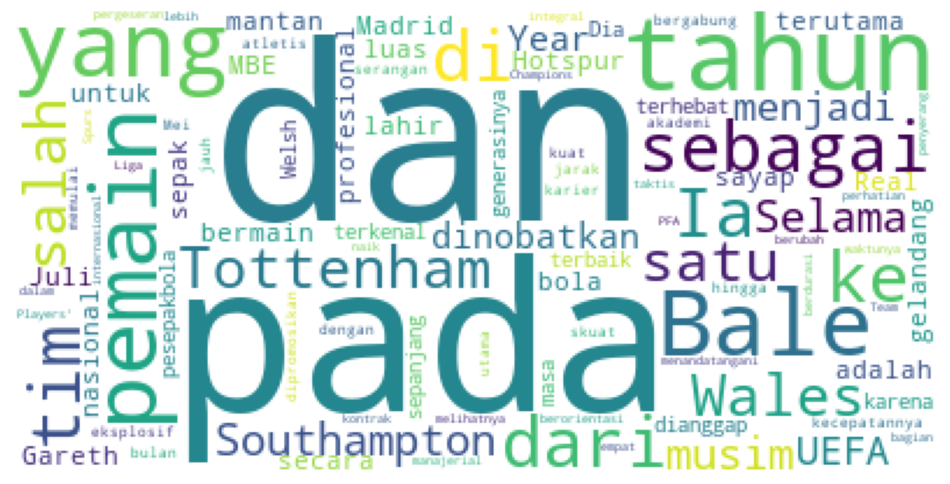

In [15]:
#!pip install wordcloud
from matplotlib import pyplot as plt 
from wordcloud import WordCloud

text = '''
Gareth Bale MBE[3] (lahir 16 Juli 1989) adalah mantan pemain sepak bola 
profesional Wales yang bermain sebagai gelandang sayap, terutama untuk 
Tottenham Hotspur, Real Madrid dan tim nasional Wales. Ia secara luas 
dianggap sebagai salah satu pesepakbola terbaik di generasinya dan salah 
satu pemain Welsh terhebat sepanjang masa. Dia terkenal karena kecepatannya 
yang eksplosif, atletis, dan serangan kuat dari jarak jauh.[4][5]

Bale memulai karier di akademi Southampton pada tahun 2005 hingga 
dipromosikan ke skuat tim utama Southampton pada musim 2006–07. 
Pada bulan Mei 2007 ia bergabung ke Tottenham dengan menandatangani
kontrak berdurasi empat tahun.[6] Selama waktunya di Spurs, pergeseran 
manajerial dan taktis melihatnya berubah menjadi pemain yang lebih 
berorientasi sebagai penyerang. Dari musim 2009-10, Bale menjadi bagian 
integral dari tim, naik ke perhatian internasional selama Liga Champions 
UEFA 2010–11.[7][8][9] Ia dinobatkan PFA Players' of the Year pada tahun 
2011 dan 2013, dan dinobatkan dalam UEFA Team of the Year pada tahun 2011 
dan 2013.
'''
wordcloud = WordCloud(background_color='white').generate(text)

plt.figure(figsize=(12,12))
plt.imshow(wordcloud)

plt.axis('off')
plt.show()

# Kmeans

In [16]:
# Bagian 1: Pra-pemrosesan Data
import pickle
import os
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

# Mengunduh paket NLTK yang diperlukan (jika belum ada)
try:
    stopwords.words('english')
except LookupError:
    import nltk
    nltk.download('stopwords')
    nltk.download('punkt')

stop_words = set(stopwords.words('english'))

# Ganti 'nama_folder_data' dengan path folder tempat file .pkl Anda berada
# Contoh: src_name = "20newsgroups.pkl"
src_name = r"E:\Tugas Semester 5\Datmin 2\TM4\20newsgroup.pckl"
src_path = os.path.join("data", src_name) 

# Memuat data (pastikan file '20newsgroups.pkl' ada di dalam folder 'data')
# Jika file tidak ada, kode ini akan error.
# Untuk tujuan demonstrasi, kita akan membuat data dummy jika file tidak ditemukan.
try:
    with open(src_path, 'rb') as fin:
        data = pickle.load(fin)
    docs = [doc for doc in data.data]
    label = data.target
except FileNotFoundError:
    print(f"Peringatan: File '{src_path}' tidak ditemukan. Menggunakan data contoh.")
    # Data contoh jika file asli tidak ada
    '''docs = [
        "The quick brown fox jumps over the lazy dog.",
        "A fast-moving brown fox leaps over a sleepy dog.",
        "The new movie is awesome, a great film.",
        "I love this new film, it is fantastic.",
        "What is the price of this computer hardware?",
        "Computer software and hardware prices are dropping."
    ]'''

def preprocess(doc):
    """
    Fungsi untuk membersihkan teks:
    1. Tokenisasi kata
    2. Hapus stopwords
    3. Ubah ke huruf kecil (case folding)
    4. Hapus karakter non-alfanumerik
    5. Hapus spasi berlebih
    """
    # Tokenisasi menjadi kata-kata
    words = word_tokenize(doc)
    
    # Menghapus stop words (kata umum seperti 'the', 'a', 'in')
    words = [t for t in words if t.lower() not in stop_words]

    sents_tok = []
    for s in words:
        s = s.strip().lower() # Case folding dan menghilangkan spasi di awal/akhir
        s = s.replace("\n", " ") # Menggantikan newline dengan spasi
        s = re.sub("[^a-zA-Z0-9]", " ", s) # Menghapus simbol (selain huruf dan angka)
        s = re.sub("\s+", " ", s) # Menghapus spasi berlebih
        if s.strip(): # Memastikan kata tidak kosong setelah dibersihkan
            sents_tok.append(s.strip())
            
    return " ".join(sents_tok)

docs_clear = []
for d in docs:
    docs_clear.append(preprocess(d))


In [17]:
import pickle
import os
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

try:
    stopwords.words('english')
except LookupError:
    import nltk
    nltk.download('stopwords')
    nltk.download('punkt')

stop_words = set(stopwords.words('english'))

src_name = r"E:\Tugas Semester 5\Datmin 2\TM4\20newsgroup.pckl"
src_path = os.path.join("data", src_name) 



def preprocess(doc):
    words = word_tokenize(doc)
    
    words = [t for t in words if t.lower() not in stop_words]

    sents_tok = []
    for s in words:
        s = s.strip().lower() 
        s = s.replace("\n", " ") 
        s = re.sub("[^a-zA-Z0-9]", " ", s) 
        s = re.sub("\s+", " ", s) 
        if s.strip(): 
            sents_tok.append(s.strip())
            
    return " ".join(sents_tok)

docs_clear = []
for d in docs:
    docs_clear.append(preprocess(d))


In [18]:
docs

['I want to get a car alarm and I am thinking about getting an Ungo Box.\n    Does anyone out there have any knowledge or experience with any of\n    these alarms?  How about price ranges for the different models?\n    Are these good car alarms?  Please email me any responces.\n\n                cak3@ns3.lehigh.edu',
 'I did hear this question asked during a radio news update of the case.  (They\nwere talking about the ongoing trial and had some audio clips).  Immediately\nafter the defense attorney asked the question, there was an "Objection!" heard\nin the background.  The clip ended at that point so I don\'t know if the\nobjection was upheld.  I can\'t imagine NC is *that* bad. \n\nThis I didn\'t hear as an audio clip but heard it reported a number of times on\nnews stories both during and after the trial.  Now the "we did it on purpose"\nthing is stretching, I think it was something more like--he had it coming.  If\nsomebody else remebers better than I on this second point, feel fr

In [19]:
docs_clear

['want get car alarm thinking getting ungo box anyone knowledge experience alarms price ranges different models good car alarms please email responces cak3 ns3 lehigh edu',
 'hear question asked radio news update case talking ongoing trial audio clips immediately defense attorney asked question objection heard background clip ended point n t know objection upheld ca n t imagine nc bad n t hear audio clip heard reported number times news stories trial purpose thing stretching think something like coming somebody else remebers better second point feel free clarify frank frank r chloupek chloupek ohstpy mps ohio state edu department physics ohio state university ohio state university',
 'quoting jeffrey j nucciarone s nucci microwave gsfc nasa gov article c4g8hv cs4 skates gsfc nasa gov 04 06 93 pertinent part jj considering buying used 90 taurus sho car jj question 37k miles took test drive day jj questions came jj jj jj second anything specifically look jj sho vintage anything specifica

In [20]:
# Bagian 2: Representasi Vektor dan Clustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Membuat representasi vektor TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
X = tfidf_vectorizer.fit_transform(docs_clear)

# Menampilkan dimensi dari matriks TF-IDF
print("Dimensi Matriks TF-IDF (dokumen, fitur):", X.shape)
print("-" * 20)

# Melakukan clustering dengan K-Means
k = 3
seed = 99 # Nilai seed untuk Random generator, agar hasil selalu sama
kmeans = KMeans(n_clusters=k, init='random', max_iter=300, random_state=seed, n_init=10) # n_init=10 ditambahkan untuk menghindari warning
kmeans.fit(X)

# Memprediksi hasil clusteringnya
C = kmeans.predict(X)
C_km = C

# Menampilkan hasil cluster untuk 10 dokumen pertama
print("Hasil Cluster (10 dokumen pertama):")
print(C_km[:10])

Dimensi Matriks TF-IDF (dokumen, fitur): (1653, 10638)
--------------------
Hasil Cluster (10 dokumen pertama):
[1 2 1 2 2 1 2 2 2 2]


In [21]:
import pickle
import os
import re
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

try:
    stopwords.words('english')
except LookupError:
    import nltk
    nltk.download('stopwords')
    nltk.download('punkt')

stop_words = set(stopwords.words('english'))

src_name = r"E:\Tugas Semester 5\Datmin 2\TM4\20newsgroup.pckl"
src_path = os.path.join("data", src_name) 



def preprocess(doc):
    words = word_tokenize(doc)
    
    words = [t for t in words if t.lower() not in stop_words]

    sents_tok = []
    for s in words:
        s = s.strip().lower() 
        s = s.replace("\n", " ") 
        s = re.sub("[^a-zA-Z0-9]", " ", s) 
        s = re.sub("\s+", " ", s) 
        if s.strip(): 
            sents_tok.append(s.strip())
            
    return " ".join(sents_tok)

docs_clear = []
for d in docs:
    docs_clear.append(preprocess(d))


from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
X = tfidf_vectorizer.fit_transform(docs_clear)

print("Dimensi Matriks TF-IDF (dokumen, fitur):", X.shape)
print("-" * 20)

k = 3
seed = 99 
kmeans = KMeans(n_clusters=k, init='random', max_iter=300, random_state=seed, n_init=10) # n_init=10 ditambahkan untuk menghindari warning
kmeans.fit(X)

C = kmeans.predict(X)
C_km = C

print("Hasil Cluster (10 dokumen pertama):")
print(C_km[:10])

Dimensi Matriks TF-IDF (dokumen, fitur): (1653, 10638)
--------------------
Hasil Cluster (10 dokumen pertama):
[1 2 1 2 2 1 2 2 2 2]


# Kmeans+

In [22]:
# (Bagian 1: Pra-pemrosesan Data - SAMA SEPERTI SEBELUMNYA)
# ... (kode impor, pemuatan data, dan fungsi preprocess tidak berubah)
# ... docs_clear = [] ...
# ... print('DONE!')

# Bagian 2: Representasi Vektor dan Clustering
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

# Membuat representasi vektor TF-IDF (Sama seperti sebelumnya)
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
X = tfidf_vectorizer.fit_transform(docs_clear)
print("Dimensi Matriks TF-IDF (dokumen, fitur):", X.shape)
print("-" * 20)

# --- BAGIAN YANG DIPERBARUI ---
# Melakukan clustering dengan K-Means++
k = 3
seed = 99

# Menggunakan inisialisasi 'k-means++'
kmPP = KMeans(n_clusters=k, 
              init='k-means++',  # Perbedaan utama ada di sini
              max_iter=300, 
              tol=0.0001, 
              random_state=seed,
              n_init=10)
kmPP.fit(X)

C_kmpp = kmPP.predict(X)

# Menampilkan hasil cluster untuk 10 dokumen pertama
print("Hasil Cluster K-Means++ (10 dokumen pertama):")
print(C_kmpp[:10])

Dimensi Matriks TF-IDF (dokumen, fitur): (1653, 10638)
--------------------
Hasil Cluster K-Means++ (10 dokumen pertama):
[2 1 2 1 1 2 1 2 1 1]


In [23]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
X = tfidf_vectorizer.fit_transform(docs_clear)
print("Dimensi Matriks TF-IDF (dokumen, fitur):", X.shape)
print("-" * 20)

k = 3
seed = 99

kmPP = KMeans(n_clusters=k, 
              init='k-means++', 
              max_iter=300, 
              tol=0.0001, 
              random_state=seed,
              n_init=10)
kmPP.fit(X)

C_kmpp = kmPP.predict(X)

print("Hasil Cluster K-Means++ (10 dokumen pertama):")
print(C_kmpp[:10])

Dimensi Matriks TF-IDF (dokumen, fitur): (1653, 10638)
--------------------
Hasil Cluster K-Means++ (10 dokumen pertama):
[2 1 2 1 1 2 1 2 1 1]


# Dbscan

In [24]:
# (Bagian 1: Pra-pemrosesan Data - SAMA SEPERTI SEBELUMNYA)
# ... (kode impor, pemuatan data, dan fungsi preprocess tidak berubah)
# ... docs_clear = [] ...
# ... print('DONE!')

# Bagian 2: Representasi Vektor (Sama seperti sebelumnya)
from sklearn.feature_extraction.text import TfidfVectorizer

# Membuat representasi vektor TF-IDF
tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
X = tfidf_vectorizer.fit_transform(docs_clear)
print("Dimensi Matriks TF-IDF (dokumen, fitur):", X.shape)
print("-" * 20)

# --- BAGIAN YANG DIPERBARUI ---
# Melakukan clustering dengan DBSCAN
import numpy as np
from sklearn.cluster import DBSCAN

# 'eps' adalah parameter kunci di DBSCAN
# Menentukan jarak maksimum antara dua sampel agar dianggap bertetangga.
# Nilai ini sangat sensitif dan mungkin perlu penyesuaian (tuning).
dbscan = DBSCAN(eps=0.5) 
dbscan.fit(X)

# Mengambil label cluster
# Label -1 berarti 'noise' atau outlier
C_db = dbscan.labels_.astype(int)

# Menampilkan hasil cluster untuk 10 dokumen pertama
print("Hasil Cluster DBSCAN (10 dokumen pertama):")
print(C_db)

Dimensi Matriks TF-IDF (dokumen, fitur): (1653, 10638)
--------------------
Hasil Cluster DBSCAN (10 dokumen pertama):
[-1 -1 -1 ... -1 -1 -1]


In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(max_df=0.95, min_df=2)
X = tfidf_vectorizer.fit_transform(docs_clear)
print("Dimensi Matriks TF-IDF (dokumen, fitur):", X.shape)
print("-" * 20)

import numpy as np
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5) 
dbscan.fit(X)

C_db = dbscan.labels_.astype(int)

print("Hasil Cluster DBSCAN (10 dokumen pertama):")
print(C_db[:10])

Dimensi Matriks TF-IDF (dokumen, fitur): (1653, 10638)
--------------------
Hasil Cluster DBSCAN (10 dokumen pertama):
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1]


In [26]:
from sklearn.metrics import silhouette_score as siluet 
C = [C_km,C_kmpp,C_db]

for res in C:
    print(siluet(X,res),end=' ')

0.017199062413339385 0.017288550842996603 -0.23765091937418498 

In [27]:
from sklearn.metrics.cluster import homogeneity_score as purity 

for res in C:
    print(purity(label,res),end=' ')

0.261907329584096 0.24818127424026448 0.0015549989772357536 

In [28]:
from sklearn.metrics import normalized_mutual_info_score as NMI 

for res in C:
    print(NMI(label,res),end=' ')

0.3241130573382853 0.30987611775581897 0.002704356633566744 

# Tugas

In [39]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# --- PREPROCESSING LIBRARIES ---
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# --- CLUSTERING & ML LIBRARIES ---
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

In [46]:
import requests
from bs4 import BeautifulSoup

# Langkah 3: CRAWLING DATA (DENGAN PERBAIKAN)
print("Memulai proses crawling...")

url = "https://id.wikipedia.org/wiki/Daftar_istilah_komputer"
documents = []

# --- BAGIAN YANG DIPERBAIKI ---
# Tambahkan header untuk menyamar sebagai browser populer
headers = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
}
# -----------------------------

try:
    # Kirim permintaan dengan header yang sudah ditentukan
    response = requests.get(url, headers=headers, timeout=10)
    response.raise_for_status()
    
    soup = BeautifulSoup(response.text, 'html.parser')
    
    content = soup.find('div', {'class': 'mw-parser-output'})
    
    if content:
        documents = [li.get_text(strip=True) for li in content.find_all('li') if ':' in li.get_text()]
        print(f"Berhasil mendapatkan {len(documents)} istilah komputer.")
    else:
        print("Error: Gagal menemukan kontainer konten utama ('div' dengan class 'mw-parser-output').")

except requests.exceptions.RequestException as e:
    print(f"Error saat melakukan koneksi ke URL: {e}")

# Lanjutkan ke sisa kode jika 'documents' berhasil diisi
if documents:
    print("\nMemulai preprocessing teks...")
    # ... (sisa kode Anda)
else:
    print("\nTidak ada dokumen untuk diproses. Program berhenti.")

Memulai proses crawling...
Berhasil mendapatkan 0 istilah komputer.

Tidak ada dokumen untuk diproses. Program berhenti.


In [47]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score


In [3]:
import requests
from bs4 import BeautifulSoup

url = "https://id.wikipedia.org/wiki/Daftar_istilah_komputer"

# tambahkan user-agent supaya tidak diblokir
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)

soup = BeautifulSoup(response.text, "html.parser")

# ambil semua link istilah komputer dari daftar
content = soup.find("div", {"class": "mw-parser-output"})
links = content.find_all("a")

istilah = []
for link in links:
    title = link.get("title")
    href = link.get("href")
    if title and href and href.startswith("/wiki/"):
        istilah.append((title, "https://id.wikipedia.org" + href))

# tampilkan 20 contoh pertama
for i, (judul, link) in enumerate(istilah[:20], start=1):
    print(f"{i}. {judul} -> {link}")


1. Terjemahkan ke bahasa Indonesia -> https://id.wikipedia.org/wiki/Berkas:Project_Translation_inspection_logo1.png
2. Wikipedia:Panduan dalam menerjemahkan artikel -> https://id.wikipedia.org/wiki/Wikipedia:Panduan_dalam_menerjemahkan_artikel
3. Bahasa Inggris -> https://id.wikipedia.org/wiki/Bahasa_Inggris
4. Bahasa Inggris -> https://id.wikipedia.org/wiki/Bahasa_Inggris
5. Bahasa Inggris -> https://id.wikipedia.org/wiki/Bahasa_Inggris
6. Wikipedia:Kriteria penghapusan cepat -> https://id.wikipedia.org/wiki/Wikipedia:Kriteria_penghapusan_cepat#A2
7. Komputer -> https://id.wikipedia.org/wiki/Komputer
8. Fast Ethernet -> https://id.wikipedia.org/wiki/Fast_Ethernet
9. 10BASE2 -> https://id.wikipedia.org/wiki/10BASE2
10. 10BASE5 -> https://id.wikipedia.org/wiki/10BASE5
11. 10BaseT -> https://id.wikipedia.org/wiki/10BaseT
12. Grafika komputer 2D -> https://id.wikipedia.org/wiki/Grafika_komputer_2D
13. 320xx -> https://id.wikipedia.org/wiki/320xx
14. Grafika komputer 3D -> https://id.wikip

In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

url = "https://id.wikipedia.org/wiki/Daftar_istilah_komputer"
headers = {"User-Agent": "Mozilla/5.0"}
response = requests.get(url, headers=headers)
soup = BeautifulSoup(response.text, "html.parser")

# ambil daftar istilah
content = soup.find("div", {"class": "mw-parser-output"})
links = content.find_all("a")

istilah = []
for link in links:
    title = link.get("title")
    href = link.get("href")
    if title and href and href.startswith("/wiki/"):
        istilah.append((title, "https://id.wikipedia.org" + href))

data = []
for i, (judul, link) in enumerate(istilah, start=1):
    try:
        r = requests.get(link, headers=headers)
        s = BeautifulSoup(r.text, "html.parser")
        p = s.find("p")  # ambil paragraf pertama
        desc = p.get_text(strip=True) if p else ""
        data.append({"Istilah": judul, "Link": link, "Deskripsi": desc})
        time.sleep(0.5)  # biar ga ke-detect spam
    except Exception as e:

# simpan ke CSV
df = pd.DataFrame(data)
df.to_csv("istilah_komputer.csv", index=False, encoding="utf-8-sig")

print("Selesai! Data disimpan di istilah_komputer.csv")


1. Terjemahkan ke bahasa Indonesia ✅
2. Wikipedia:Panduan dalam menerjemahkan artikel ✅
3. Bahasa Inggris ✅
4. Bahasa Inggris ✅
5. Bahasa Inggris ✅
6. Wikipedia:Kriteria penghapusan cepat ✅
7. Komputer ✅
8. Fast Ethernet ✅
9. 10BASE2 ✅
10. 10BASE5 ✅
11. 10BaseT ✅
12. Grafika komputer 2D ✅
13. 320xx ✅
14. Grafika komputer 3D ✅
15. BSD ✅
16. Modem ✅
17. 64-bit ✅
18. Ada (bahasa pemrograman) ✅
19. AirPort ✅
20. AIX ✅
21. Bahasa pemrograman ✅
22. Algoritme ✅
23. Hukum Amdahl ✅
24. America Online ✅
25. Amiga ✅
26. AOL ✅
27. Apple Computer ✅
28. Apple Macintosh ✅
29. ALU ✅
30. ASCII ✅
31. Active Server Pages ✅
32. ASP.NET ✅
33. Assembler ✅
34. Atari ✅
35. Automaton ✅
36. BASIC ✅
37. BCPL ✅
38. BeOS ✅
39. Berkas video ✅
40. Berkeley Software Distribution ✅
41. Big Mac ✅
42. Notasi O besar ✅
43. Sistem bilangan biner ✅
44. Bit ✅
45. Cakram Blu-ray ✅
46. Blue Screen of Death ✅
47. Bourne-Again shell ✅
48. Bahasa pemrograman B ✅
49. Brainfuck ✅
50. C++ ✅
51. C sharp ✅
52. C (bahasa pemrograman) 

In [1]:
import requests
from bs4 import BeautifulSoup
import re
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import davies_bouldin_score, silhouette_score
import pandas as pd
import nltk
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
data = pd.read_csv(r"E:\Tugas Semester 5\Datmin 2\TM4\istilah_komputer.csv")
data_2 = data.iloc[20:31].copy()

texts = data_2["Deskripsi"].astype(str)
nltk.download('stopwords')
stop_words = set(stopwords.words('indonesian'))

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def preprocess(text):
    # lowercase
    text = text.lower()
    # hapus url
    text = re.sub(r"http\S+", " ", text)
    # hapus angka & tanda baca
    text = re.sub(r"[^a-z\s]", " ", text)
    # tokenisasi
    tokens = text.split()
    # hapus stopwords
    tokens = [w for w in tokens if w not in stop_words]
    # stemming
    tokens = [stemmer.stem(w) for w in tokens]
    return " ".join(tokens)

data_2["clean_text"] = texts.apply(preprocess)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\MSI_PC\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [39]:
data

,Istilah,Link,Deskripsi
0,Terjemahkan ke bahasa Indonesia,https://id.wikipedia.org/wiki/Berkas:Project_T...,Berkas ini berasal dari Wikimedia Commons dan ...
1,Wikipedia:Panduan dalam menerjemahkan artikel,https://id.wikipedia.org/wiki/Wikipedia:Pandua...,"Salah satu cara ""paling sederhana"" dalam menge..."
2,Bahasa Inggris,https://id.wikipedia.org/wiki/Bahasa_Inggris,NaN
3,Bahasa Inggris,https://id.wikipedia.org/wiki/Bahasa_Inggris,NaN
4,Bahasa Inggris,https://id.wikipedia.org/wiki/Bahasa_Inggris,NaN
...,...,...,...
243,Zilog Z80,https://id.wikipedia.org/wiki/Zilog_Z80,Zilog Z80adalah sebuahmikroprosesoryang didesa...
244,Daftar ilmuwan komputer,https://id.wikipedia.org/wiki/Daftar_ilmuwan_k...,Berikut merupakan daftarilmuwan komputerberdas...
245,Daftar bertopik Internet,https://id.wikipedia.org/wiki/Daftar_bertopik_...,Berikut merupakan daftar bertopikinternetberda...
246,Daftar topik teknologi informasi paling dasar,https://id.wikipedia.org/wiki/Daftar_topik_tek...,Daftar topikteknologi informasipaling dasarmel...


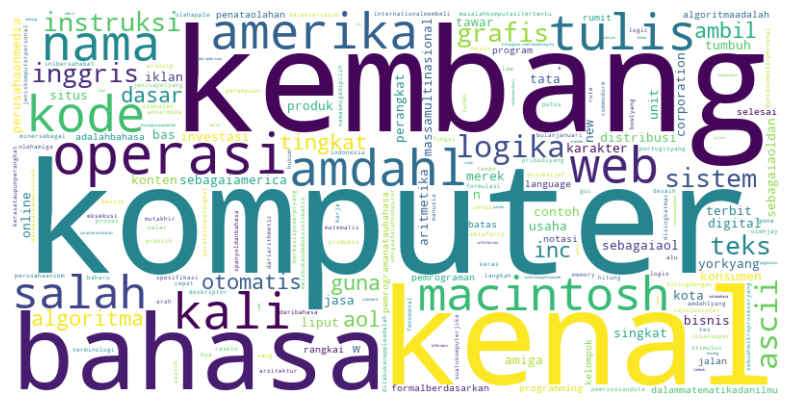

In [3]:
all_text = " ".join(data_2["clean_text"])

# wordcloud
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()



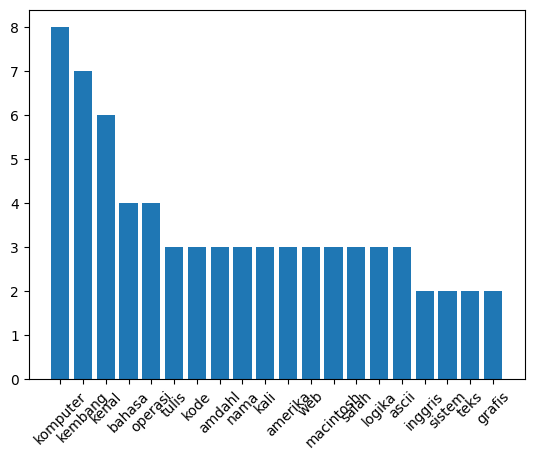

In [4]:
# most common words
word_counts = Counter(all_text.split()).most_common(20)
words, counts = zip(*word_counts)
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.show()

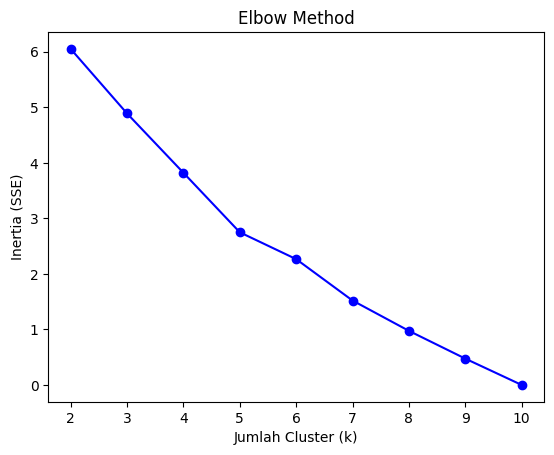

In [12]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertias = []
K = range(2,11)

for k in K:
    model = KMeans(n_clusters=k, random_state=42, n_init=10)
    model.fit(X)
    inertias.append(model.inertia_)

plt.plot(K, inertias, 'bo-')
plt.xlabel("Jumlah Cluster (k)")
plt.ylabel("Inertia (SSE)")
plt.title("Elbow Method")
plt.show()


In [5]:
# TF-IDF
vectorizer = TfidfVectorizer(max_df=0.8, min_df=2)
X = vectorizer.fit_transform(data_2["clean_text"])

# clustering KMeans
k = 7  # bisa dicoba beberapa nilai
model = KMeans(n_clusters=k, random_state=42)
labels = model.fit_predict(X)

data_2["cluster"] = labels
data_2

,Istilah,Link,Deskripsi,clean_text,cluster
20,Bahasa pemrograman,https://id.wikipedia.org/wiki/Bahasa_pemrograman,Bahasa pemrogramanataubahasa penataolahan(baha...,bahasa pemrogramanataubahasa penataolahan baha...,4
21,Algoritme,https://id.wikipedia.org/wiki/Algoritme,"Dalammatematikadanilmu komputer,algoritmaadala...",dalammatematikadanilmu komputer algoritmaadala...,2
22,Hukum Amdahl,https://id.wikipedia.org/wiki/Hukum_Amdahl,Hukum Amdahl(Inggris:Amdahl's law) adalah prin...,hukum amdahl inggris amdahl s law prinsip dasa...,6
23,America Online,https://id.wikipedia.org/wiki/America_Online,AOL Inc.(sebelumnya dikenal sebagaiAmerica Onl...,aol inc kenal sebagaiamerica online tulis seba...,5
24,Amiga,https://id.wikipedia.org/wiki/Amiga,Amigaadalahkomputer pribadiyang dikembangkan o...,amigaadalahkomputer pribadiyang kembang oleham...,0
25,AOL,https://id.wikipedia.org/wiki/AOL,AOL Inc.(sebelumnya dikenal sebagaiAmerica Onl...,aol inc kenal sebagaiamerica online tulis seba...,5
26,Apple Computer,https://id.wikipedia.org/wiki/Apple_Computer,37°19′55″N122°01′52″W﻿ / ﻿37.33182°N 122.03118...,n w n w,3
27,Apple Macintosh,https://id.wikipedia.org/wiki/Apple_Macintosh,"Macintosh, atau disingkatMac, adalah salah sat...",macintosh disingkatmac salah jeniskomputerpers...,6
28,ALU,https://id.wikipedia.org/wiki/ALU,"ALU, singkatan dariarithmetic logic unit(Bahas...",alu singkat dariarithmetic logic unit bahasa i...,1
29,ASCII,https://id.wikipedia.org/wiki/ASCII,(ASCII) singkatan dariAmerican Standard Code f...,ascii singkat dariamerican standard code for i...,3


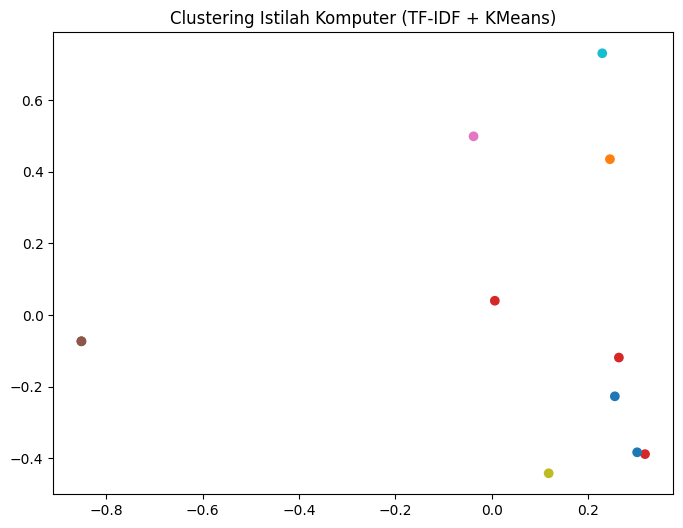

In [10]:
pca = PCA(n_components=2)
reduced = pca.fit_transform(X.toarray())

plt.figure(figsize=(8,6))
plt.scatter(reduced[:,0], reduced[:,1], c=labels, cmap="tab10")
plt.title("Clustering Istilah Komputer (TF-IDF + KMeans)")
plt.show()

In [11]:
sil_score = silhouette_score(X, labels)
db_score = davies_bouldin_score(X.toarray(), labels)

print("Silhouette Score:", sil_score)
print("Davies-Bouldin Index:", db_score)


Silhouette Score: 0.22862354693905032
Davies-Bouldin Index: 0.7165448442857587
